In [1]:
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Util function for loading point clouds|

import numpy as np

# Data structures and functions for rendering
from pytorch3d.structures import Pointclouds
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVOrthographicCameras, 
    PointsRasterizationSettings,
    PointsRenderer,
    PulsarPointsRenderer,
    PointsRasterizer,
    AlphaCompositor,
    NormWeightedCompositor
)
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


In [2]:
# a = torch.load("./log/tensorf_anim_VM_traintest48/tensorf_anim_VM_traintest48_sh_999.th")
# print(a.keys())
# print(a["state_dict"].keys())
# print(a["state_dict"]["feats"].shape)
# print(a["state_dict"]["feats"])

In [28]:
# # Initialize a camera.
# # 0elev だと #Y up Z forward
# # 90elevだと #Z up Y forward
# #上からの絵がほしければ、elevで？

# import glob
# folder = "npz_0906old"
# files = glob.glob("./"+folder+"/data_point_cloud_*.npz")
# rgb_arr = []
# vert_arr = []
# for obj_filename in files:
#     pointcloud = np.load(obj_filename)
#     verts = torch.Tensor(pointcloud['xyz_sampled']).to(device).reshape(-1, 3)
#     print(pointcloud['sigma'].shape)
#     sigma = torch.Tensor(pointcloud['sigma']).to(device).reshape(-1, 1)
# #     sigma[...]  = 1
# #     print(sigma)
    
#     rgb = torch.Tensor(pointcloud['rgb']).to(device).reshape(-1, 3)
#     lightup = 1000
#     rgb[...,0] *= lightup
#     rgb[...,1] *= lightup
#     rgb[...,2] *= lightup
#     liftup = 0.3
#     rgb[...,0] +=  liftup
#     rgb[...,1] +=  liftup
#     rgb[...,2] +=  liftup
    
# #     print(verts.shape, sigma.shape, rgb.shape)
#     rgb = torch.cat([rgb, sigma], dim=-1)
#     print(rgb.shape)
#     vert_arr.append(verts)
#     rgb_arr.append(rgb)

# point_cloud = Pointclouds(points=vert_arr, features=rgb_arr)
# R, T = look_at_view_transform(dist = 30, elev = 90, azim = 0,  at=((0, 0,0),))
# # print(R,T)
# scale = 0.2
# cameras = FoVOrthographicCameras(device=device, R=R, T=T, znear=0.01,scale_xyz=torch.tensor([[scale,scale, scale]]))
# # Define the settings for rasterization and shading. Here we set the output image to be of size
# # 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# # and blur_radius=0.0. Refer to raster_points.py for explanations of these parameters. 
# raster_settings = PointsRasterizationSettings(
#     image_size=512, 
#     radius = 0.0005,
#     points_per_pixel = 10
# )


# # Create a points renderer by compositing points using an alpha compositor (nearer points
# # are weighted more heavily). See [1] for an explanation.
# rasterizer = PointsRasterizer(cameras=cameras, raster_settings=raster_settings)
# renderer = PointsRenderer(
#     rasterizer=rasterizer,
#     compositor=AlphaCompositor()
# )
# images = renderer(point_cloud)
# plt.figure(figsize=(10, 10))
# plt.imshow(images[0, ..., :3].cpu().numpy())
# plt.axis("off");

In [3]:
# # Initialize a camera.
# # 0elev だと #Y up Z forward
# # 90elevだと #Z up Y forward
# #上からの絵がほしければ、elevで？

# import glob
# folder = "npz_50_12"
# files = glob.glob("./"+folder+"/data_point_cloud_*.npz")
# rgb_arr = []
# vert_arr = []
# for obj_filename in files:
#     pointcloud = np.load(obj_filename)
    
#     verts = torch.Tensor(pointcloud['xyz_sampled']).to(device).reshape(-1, 3)
    
#     weights = pointcloud["weights"]
#     print("weights", weights[:verts.shape[0]].shape)
    
#     print("verts.shape", verts.shape)
#     print(torch.max(verts[...,0]),torch. max(verts[...,1]), torch.max(verts[...,2]))
#     print(torch.min(verts[...,0]), torch.min(verts[...,1]),torch. min(verts[...,2]))
#     mask = verts[...,2] < 0
    
#     print(pointcloud['sigma'].shape)
#     sigma = torch.Tensor(pointcloud['sigma']).to(device).reshape(-1, 1)
#     #sigma[...]  = 1
#     #sigma[mask] = 0
#     sigma[...] = 0
    
#     rgb = torch.Tensor(pointcloud['rgb']).to(device).reshape(-1, 3)
#     lightup = 1
#     rgb[...,0] = torch.tensor(weights[:verts.shape[0]][...,1])
#     rgb[...,0] *= lightup
#     rgb[...,1] = 0
#     rgb[...,2] = 1
#     liftup = 1
#     shift = 0.7
    
#     rgb = torch.cat([rgb, sigma], dim=-1)
#     vert_arr.append(verts)
#     rgb_arr.append(rgb)

# point_cloud = Pointclouds(points=vert_arr, features=rgb_arr)
# R, T = look_at_view_transform(dist = 30, elev = 90, azim = 0,  at=((0, 0,0),))
# print(R,T)
# scale = 0.2
# cameras = FoVOrthographicCameras(device=device, R=R, T=T, znear=0.01,scale_xyz=torch.tensor([[scale,scale, scale]]))

# raster_settings = PointsRasterizationSettings(
#     image_size=512, 
#     radius = 0.0005,
#     points_per_pixel = 10
# )



# # Create a points renderer by compositing points using an alpha compositor (nearer points
# # are weighted more heavily). See [1] for an explanation.
# rasterizer = PointsRasterizer(cameras=cameras, raster_settings=raster_settings)
# renderer = PointsRenderer(
#     rasterizer=rasterizer,
#     compositor=AlphaCompositor()
# )
# images = renderer(point_cloud)
# plt.figure(figsize=(10, 10))
# plt.imshow(images[0, ..., :3].cpu().numpy())
# plt.axis("off")

In [11]:
# print(torch.rand(2,3))
samples = 3
joints = 2
divs = 2

sh_mult = torch.rand(samples*joints, 1, divs)
sh_mult[:,:,1:] = 0.0

sh_feats = torch.rand(joints, divs)
sh_feats[:, 1:] = 0.0
#sh_feats[0,:] = 0.0;

rad_sh = sh_feats.reshape(joints, 1, sh_mult.shape[-1])#(j, 1, 9)

# print(sh_mult)
# print()
# print(sh_feats)
# print()
print(sh_mult , rad_sh.repeat(samples, 1, 1))
# print(rad_sh.repeat(samples, 1, 1))
# print()
#↓sample*joints, 1, divs × samples*joints, 1, divs
rads = torch.relu(torch.sum(sh_mult * rad_sh.repeat(samples, 1, 1), dim=-1))#(sample*j, 1) #jointのsample方向の経
#そっかゼロではないのか
# print(rads)
#rads = rads.reshape(joints, samples)#(j, sample) #ここか
rads = torch.transpose(rads.reshape(samples, joints), 0, 1)
# print(rads)
# print(rads[:,0])

tensor([[[0.3428, 0.0000]],

        [[0.2638, 0.0000]],

        [[0.8647, 0.0000]],

        [[0.3942, 0.0000]],

        [[0.3920, 0.0000]],

        [[0.6177, 0.0000]]]) tensor([[[0.5053, 0.0000]],

        [[0.9913, 0.0000]],

        [[0.5053, 0.0000]],

        [[0.9913, 0.0000]],

        [[0.5053, 0.0000]],

        [[0.9913, 0.0000]]])


# 点群表示の元デモ

In [4]:
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Util function for loading point clouds|
import numpy as np

# Data structures and functions for rendering
from pytorch3d.structures import Pointclouds
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVOrthographicCameras, 
    PointsRasterizationSettings,
    PointsRenderer,
    PulsarPointsRenderer,
    PointsRasterizer,
    AlphaCompositor,
    NormWeightedCompositor
)
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
DATA_DIR = "./data"
obj_filename = os.path.join(DATA_DIR, "PittsburghBridge/pointcloud.npz")

# Load point cloud
import glob
files = glob.glob("./data_point_cloud_*.npz")
rgb_arr = []
vert_arr = []
# for obj_filename in files:
pointcloud = np.load(obj_filename)
verts = torch.Tensor(pointcloud['verts']).to(device).reshape(-1, 3)
#     print(pointcloud['sigma'].shape)
#     sigma = torch.Tensor(pointcloud['sigma']).to(device).reshape(-1, 1)
    
rgb = torch.Tensor(pointcloud['rgb']).to(device).reshape(-1, 4)
#     print(verts.shape, sigma.shape, rgb.shape)
#     rgb = torch.cat([rgb, sigma], dim=-1)
print(rgb.shape)
vert_arr.append(verts)
rgb_arr.append(rgb)

point_cloud = Pointclouds(points=vert_arr, features=rgb_arr)

torch.Size([438544, 4])


In [20]:
print(torch.min(vert_arr[0][...,0]), torch.min(vert_arr[0][...,1]), torch.min(vert_arr[0][...,2]))

# print(torch.min(vert_arr[1][...,0]), torch.min(vert_arr[1][...,1]), torch.min(vert_arr[1][...,2]))

print(torch.max(vert_arr[0][...,0]), torch.max(vert_arr[0][...,1]), torch.max(vert_arr[0][...,2]))

# print(torch.max(vert_arr[1][...,0]), torch.max(vert_arr[1][...,1]), torch.max(vert_arr[1][...,2]))

tensor(-0.9588, device='cuda:0') tensor(-0.5897, device='cuda:0') tensor(0.3987, device='cuda:0')
tensor(0.8793, device='cuda:0') tensor(-0.1313, device='cuda:0') tensor(2.2398, device='cuda:0')


tensor([[[-1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0., -1.]]]) tensor([[   -0.,    -0., 30000.]])


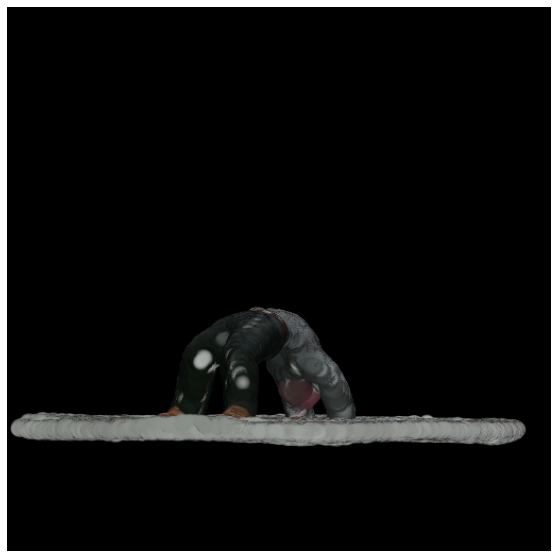

In [24]:
# Initialize a camera.
#Y up Z forward
R, T = look_at_view_transform(dist = 30000, elev = 0, azim = 0,  at=((0,0, 0),))
print(R,T)
scale = 1
cameras = FoVOrthographicCameras(device=device, R=R, T=T, znear=0.01,scale_xyz=torch.tensor([[scale,scale, scale]]))
# print(cameras.get_image_size())
# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. Refer to raster_points.py for explanations of these parameters. 
raster_settings = PointsRasterizationSettings(
    image_size=512, 
    radius = 0.03,
    points_per_pixel = 10
)


# Create a points renderer by compositing points using an alpha compositor (nearer points
# are weighted more heavily). See [1] for an explanation.
rasterizer = PointsRasterizer(cameras=cameras, raster_settings=raster_settings)
renderer = PointsRenderer(
    rasterizer=rasterizer,
    compositor=AlphaCompositor()
)
images = renderer(point_cloud)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");

In [1]:
# import glob
# import torch
# path = "./log/tensorf_anim_VM_traintest18/tensorf_anim_VM_traintest18_sh*.th"
# paths = glob.glob(path)
# # print(paths)

# # for p in paths:
# #     t = torch.load(p)
# #     print(t)
# #     print(t["state_dict"].keys())
# #     print()
# # paths[-2]
# print(paths[0])
# t = torch.load(paths[500])
# # t["feats"]
# feats = t["state_dict"]["feats"].to("cpu")
# print(t)

In [2]:
# import numpy as np
# from ipygany import Scene, PolyMesh
# from vedo import *
# # import torch
# from nerf.render_util import *
# from models.sh import eval_sh_bases

# scale = 0.01


# animation_conf="./data/nerf_synthetic/anim"+"/transforms.json"
# skeleton =  make_joints_from_blender(animation_conf)
# joint_positions =skeleton.get_listed_positions().to("cpu")
# # print(joint_positions)
# # 
# meshes = []
# sph = Sphere(pos=(0,0,0), r=10, c='r4', alpha=0, res=12, quads=False)
# # points = np.array(sph.points())
# # faces = np.array(sph.faces())
# points = torch.tensor(sph.points()) * scale
# faces = torch.tensor(sph.faces())


# mesh = PolyMesh(
#     vertices=points,
#     triangle_indices=faces
# )
# mesh.default_color = "#999999"
# meshes.append(mesh)

# for i, p in enumerate( joint_positions):

#     sph = Sphere(pos=(0,0,0), r=0.1, c='r5', alpha=1, res=12, quads=False)
#     # points = np.array(sph.points())
#     # faces = np.array(sph.faces())
#     positions = torch.tensor(sph.points())
#     positions = apply_sh(positions, feats[i])
#     positions = positions + p
#     points = (positions) * scale
# #     points = apply_sh(points)
#     faces = torch.tensor(sph.faces())


#     mesh = PolyMesh(
#         vertices=points,
#         triangle_indices=faces
#     )
#     meshes.append(mesh)
    
# # mesh2 = PolyMesh(
# #     vertices=points+np.array([1,1,1]),
# #     triangle_indices=faces
# # )
# print(len(meshes))
# scene = Scene(meshes)
# scene

In [3]:
# def apply_sh(points, sh_feats= torch.zeros(9)):
#     sh_mult = eval_sh_bases(2, points)
#     rad_sh = sh_feats
#     rads = torch.relu(torch.sum(sh_mult * rad_sh.repeat(points.shape[0], 1), dim=-1) + 0.5)#(sample*j, 1)
# #     print(rads)
#     return rads.unsqueeze(-1)* points

In [4]:
# from pytorch3d.structures import Pointclouds

In [5]:
# !mkdir -p data/PittsburghBridge
# !wget -P data/PittsburghBridge https://dl.fbaipublicfiles.com/pytorch3d/data/PittsburghBridge/pointcloud.npz